In [210]:
# itinerary:
    # write a flexible function to compute SE of a list of ints & floats
    # use the scatterplot visualization from seaborn
    # create a DataFrame class with methods that formalize a 'dataset' (dictionary with keys = varnames, values = lists of data)

In [211]:
# for computing the SE of a list X:
# 0.) Compute list X's average    [X]
# 1.) take the difference of an element x_i in X against X's average [ ]
# 2.) square that difference
# 3.) do 1&2 for every x_i in X
# 4.) sum them together

In [212]:
x = [1,5,7,3,7,3,6]

In [213]:
x[1]

5

In [215]:
# compute the average of list x
x_bar = sum(x) / len(x)
x_bar

4.571428571428571

In [216]:
(x[0] - x_bar)**2  # this is steps 0-2 for a single value x_i in X

12.755102040816325

In [217]:
summation_of_xs = 0  # instantiate the variable that will store our sum
for x_i in x:
    print((x_i - x_bar)**2)  # every x_i step 0-2
    summation_of_xs += ((x_i - x_bar)**2)  # modify the sum in-place

print(summation_of_xs)

12.755102040816325
0.1836734693877553
5.89795918367347
2.4693877551020402
5.89795918367347
2.4693877551020402
2.040816326530613
31.71428571428572


In [219]:
sample_std_deviation = (summation_of_xs / (len(x)-1))**(1/2)  # numerator of our SE formula
sample_std_deviation

2.29906813420444

In [220]:
# note: be careful about recursively affecting variables, e.g. by setting its value to its current value + / - something else
# if we compute sample std_deviation in steps:
sample_std_deviation = (summation_of_xs / (len(x)-1))

In [221]:
# and do the square-root-ing in this new block:
sample_std_deviation = sample_std_deviation**(1/2)
# if we run this block over and over again it will change the value further

In [222]:
root_n = len(x)**(1/2)  # denominator of our SE formula

In [223]:
standard_error = sample_std_deviation / root_n

In [224]:
standard_error

0.8689660757568884

In [244]:
# now that we fleshed out the code to do it for our example list, let's write a function that accepts -any- list
# (and, let's be sure to provide good documenation & raise errors when the end-user isn't doing what we expect them to do)

def compute_std_error(x):
    '''Accepts as an argument a list, and prints the standard error of that list.'''
    
    # tests of the structure of the input list:
    # 1.) first check to ensure that the input data is a list (otherwise, we can't iterate through it as expected)
    if not isinstance(x,list):
        raise TypeError('X must be a list.')
    # 2.) make sure every element is a integer or float (otherwise, we can't safely do arithmetic on every element in the list)
    for x_i in x:
        if not (isinstance(x_i,int) or isinstance(x_i,float)):
            raise TypeError('Element \'{x_i}\' of list X needs to be of class <int> or <float>. Type {type_xi} is not allowed.'.format(x_i=x_i,type_xi=type(x_i)))
    # 3.) make sure the list has >= 2 elements (otherwise, we'd get a divide by 0 error)
    if len(x)<=1:
        raise ValueError('List X cannot be < len 2.')
    
    # if all tests pass, proceed with the main functionality below:
    x_bar = sum(x) / len(x)
    summation_of_xs = 0
    for x_i in x:
        summation_of_xs += ((x_i - x_bar)**2)
    sample_std_deviation = (summation_of_xs / (len(x)-1))**(1/2)
    root_n = len(x)**(1/2)
    standard_error = sample_std_deviation / root_n
    print(standard_error)

In [245]:
compute_std_error('test string; not a list!')

TypeError: X must be a list.

In [246]:
compute_std_error([1,5.0,'bad list'])

TypeError: Element 'bad list' of list X needs to be of class <int> or <float>. Type <class 'str'> is not allowed.

In [247]:
compute_std_error([42])

ValueError: List X cannot be < len 2.

In [248]:
# let's generate some synthetic data and start thinking about working with multiple lists / columns / series of data
# (approaching a full-fledged dataset)
import random

In [251]:
# our dear friend 'random' can draw values from the normal distribution as well. n=1000 obs from std normal:
U = []
for i in range(0,1000):
    U.append(random.normalvariate(0,1))

In [252]:
# perhaps we're skeptical that the 'random' module is really giving us draws from the std normal distribution.
# let's recycle some of our Day 2 code to test whether it seems to be okay.
import seaborn as sns

# remember this?
def generate_randint_distribution(maximum_num, num_draws):
    '''maximum_num is the maximum number that x can take.
    num_draws is the number of times to repeat the while loop.'''
    
    if not isinstance(maximum_num, int):
        raise ValueError('maximum_num needs to be an integer.')
    if not isinstance(num_draws, int):
        raise ValueError('num_draws needs to be an integer.')
        
    counter = 0
    dataset = []
    while True:
        x = random.randint(0,maximum_num)
        # print(x)
        dataset.append(x)

        # if x == 100:
        #     print(x)
        #     break

        counter = counter+1
        if counter >= num_draws:
            break
    sns.histplot(data=dataset,  bins=maximum_num+1)

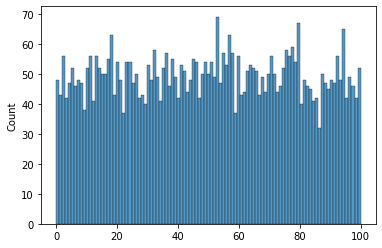

In [253]:
generate_randint_distribution(100,5000)

In [254]:
# let's recycle it for drawing from the normal distribution instead.
def generate_randnormal_distribution(mu, sigma, num_draws):
    '''maximum_num is the maximum number that x can take.
    num_draws is the number of times to repeat the while loop.'''
    
    # GOOD TESTS & FAILSAFES SHOULD GO HERE! Skipping for now...
        
    counter = 0
    dataset = []
    while True:
        x = random.normalvariate(mu,sigma)
        # print(x)
        dataset.append(x)

        # if x == 100:
        #     print(x)
        #     break

        counter = counter+1
        if counter >= num_draws:
            break
    sns.histplot(data=dataset,  bins='auto')

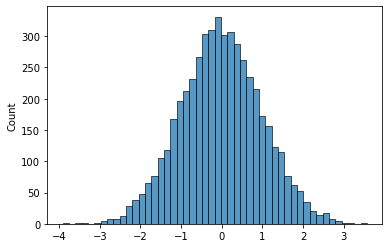

In [255]:
generate_randnormal_distribution(0,1, 5000)  # draw from X~N(0,1) 5000 times.

In [ ]:
# looks like it works fine! onto creating our synthetic dataset

In [256]:
# data-generating process: y = beta*x + error   ,   error ~ N(0,1),    x in X ~ N(0,1), beta = 2

error = []
for i in range(0,1000):
    error.append(random.normalvariate(0,1))

X = [] 
for i in range(0,1000):
    X.append(random.normalvariate(0,1))
    
y = []
for i in range(0,1000):
    y_i = 2*X[i] + error[i]
    y.append(y_i)

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

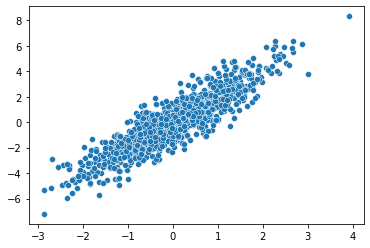

In [257]:
sns.scatterplot(X,y)

In [261]:
compute_std_error(error)  # our helpful function from earlier is ready  for any list of ints & floats with len >=2!

0.03115416439446249


In [262]:
# we can use a dictionary to define a 'dataset' whose keys are variable names and values are lists of data
dataset = {'y': y, 'X': X, 'error': error}

In [264]:
# with dicts, recall that we can pull values using the keys for indexing:
print(dataset['X'])
# and we can note that the value associated with dataset's key 'X' is, itself, a list, and index into that as well:
print('this is just the 6th element of X', dataset['X'][5])

[-1.188213406851786, 0.4335031048760619, -1.5443039959337006, 0.2524941870368334, -0.4085935047745458, -1.0471093422873332, 0.06566446190500193, 1.0048192911295493, 1.7546361329701596, 0.8091378204029955, 1.3972434746876154, 0.18309189074894935, 0.8367055388978271, -1.288139862609769, -1.252390656942856, -1.4391434623919517, 1.2378657839407654, -0.19102029461230008, 2.0631214860228524, -1.9764152763778613, 0.0849897615866723, 0.16846805525880373, -0.6642828508433662, 0.7564732570351247, -0.45439000834325505, -2.452086665985244, -0.4263297915815941, 2.181395708897847, 0.5144123969508921, -0.11523348567940278, 0.9814694981867499, -0.7616944227472499, -0.3718303340546824, 0.19250710645309127, -0.5224842612624724, -1.703423568112913, -0.5973029195080802, 0.8317792250916585, -1.0903953672907156, 0.6073711907441776, -0.01804194828902454, -0.8556998946222442, -0.20672137629119425, 0.6741061285406553, -0.4593035220867959, -0.92581951525912, -1.2103722479531607, 1.4999173000163784, 0.9187315670

In [265]:
# if we want to add new data to the dictionary, we can 'update' the dictionary (it's like list's 'append' method)
X_2 = []
for i in range(0,1000):
    X_2.append(random.normalvariate(0,10))  # ~N(0,10)
dataset.update({'X_2': X_2})

In [267]:
# keys must be unique! so if you try to update but the key already exists, it'll overwrite it without warning
dataset.update({'y': 'junk'})
dataset.update({'X': 5})
dataset.update({'error': 42.0})
dataset.update({'X_2': 'destroyed our dataset'})

dataset

{'y': 'junk', 'X': 5, 'error': 42.0, 'X_2': 'destroyed our dataset'}

In [ ]:
# we want to formalize the dataset structure and give it some additional functionality
# for example, we might want to quickly update the dataset with a new column of data without needing to use dict's .update method
# we might also want to prevent the dataset's key:value pair from being overwritten if we try to update with an existing varname
# in dictionary form, if we want to plot a scatter with e.g. X and y, we need to do indexing:
    # sns.scatterplot(dataset['y'], dataset['X'])
# let's try to streamline the idea of a dataset by creating a DataFrame -class-
# classes allow us to define class-specific -methods-, or functions that pertain only to the class
# for example, below we'll define an append_column method. you can't append_column on e.g. the class <int> or <float>; only
    # class <DataFrame>

In [297]:
class DataFrame():  
    '''This formalizes a dictionary, whose keys are variable names and whose values are lists of data.
    We don't yet know everything we'll want to do with a dataset dictionary, so it's safe to create a class that
    future-proofs us.'''
    
    # 'self' shows up a lot; don't worry about it for now
    def __init__(self):  # this is the DataFrame class' initialization "method" (method = function, for a class)
        self.dataset = {}
    
    def append_column(self, list_of_data, column_name):
        '''Accepts a list of data to pass in to the dataset with the associated column_name.'''
        # check arguments
        # 1.) verify that the list_of_data is of the correct type (just like for SE)
        self.verify_datatype(list_of_data)
        # 2.) -prevent- the user from appending the column of data if the column_name is already in use in dataset
        if column_name in self.dataset.keys():
            raise NameError('column_name \'{column_name}\' already exists in dataset.'.format(column_name=column_name))
            
        # main functionality
        self.dataset.update({column_name: list_of_data})
        
    def verify_datatype(self, list_of_data):
        '''Ensures the list_of_data being passed in is in 'proper' format (just like for our SE function).'''
        if not isinstance(list_of_data,list):
            raise TypeError('list_of_data must be a list.')
        for x_i in list_of_data:
            if not (isinstance(x_i,int) or isinstance(x_i,float)):
                raise TypeError('Element \'{x_i}\' of list_of_data needs to be of class <int> or <float>. Type {type_xi} is not allowed.'.format(x_i=x_i,type_xi=type(x_i)))
        if len(list_of_data)<=1:
            raise ValueError('list_of_data cannot be < len 2.')
            
    def create_scatterplot(self, list_1, list_2):
        X_data = self.dataset[list_1]
        y_data = self.dataset[list_2]
        sns.scatterplot(X_data, y_data)

In [298]:
# we can "instantiate an instance of the class DataFrame":
my_dataframe = DataFrame()

In [299]:
my_dataframe.append_column(y, 'y')
my_dataframe.append_column(X, 'X')

In [300]:
my_dataframe.append_column(y, 'y')

NameError: column_name 'y' already exists in dataset.

In [301]:
my_dataframe.append_column('this is bad data; we need a list (and a proper one!)', 'bad_data')

TypeError: list_of_data must be a list.

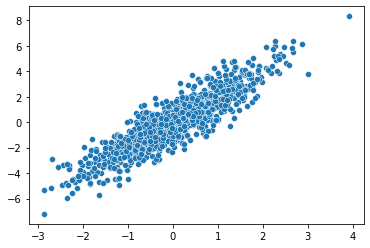

In [302]:
my_dataframe.create_scatterplot('X', 'y')

In [305]:
# we can view a specific slice of the dataset like this:
my_dataframe.dataset['X']
# and we can even use our global function compute_std_error on it
compute_std_error(my_dataframe.dataset['X'])

0.03232412674726553


In [306]:
# now that we have our nice DataFrame class, let's instantiate another one!
error2 = [random.normalvariate(0,1) for i in range(0,1000)]  # this is a 'list comprehension', which we'll see on Day 4
X2 = [random.normalvariate(0,5) for i in range(0,1000)]
y2 = [((0.5*x_i**2) + (2*x_i) + e_i) for (x_i,e_i) in zip(X2,error2)]  # zip() method lets us walk through multiple lists simultaneously

In [309]:
my_dataframe2 = DataFrame()
my_dataframe2.append_column(y2, 'y')
my_dataframe2.append_column(X2, 'X')
my_dataframe2.append_column(error2, 'error')

C:\Users\ethan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


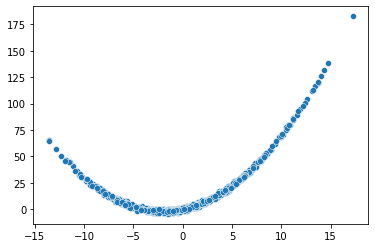

In [310]:
my_dataframe2.create_scatterplot('X', 'y')

In [311]:
# you can imagine how many bits of helpful functionality we could add to our DataFrame class to make our lives easier
# fortunately, a team has already done this for many years with their own DataFrame class
import pandas as pd

In [312]:
dataframe = pd.DataFrame([X,y])

In [313]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-1.188213,0.433503,-1.544304,0.252494,-0.408594,-1.047109,0.065664,1.004819,1.754636,0.809138,...,0.346017,-0.973047,-0.358829,2.668268,0.786271,2.994943,0.210202,0.708067,-2.716280,0.622166
1,-3.040182,3.669111,-2.931446,0.544249,-0.384014,-2.250336,-0.598773,2.981205,1.587534,1.571394,...,1.304637,-1.921803,0.653994,6.394806,0.809714,3.817155,0.765616,2.251192,-5.198857,1.423773


In [ ]:
# this is probably not what we expected / hoped for; maybe we wanted 1000 rows x 2 columns, with named columns X and y
# we'll see how to work with pandas on Day 4. this is perhaps one of the most important packages you'll work with, so it
# warrants special attention.